In [1]:
# Observable trends
# 1) The Urban city type has the highest percentage of drivers,total fare and 
#    total rides as compared to suburban and rural types.
# 2) The average Fare tends to decrease as the total number of rides increases.
# 3) Rural city type has least number of rides, least driver count and least share of total fare.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# read the csv files into pandas as dataframes
filepath = os.path.join("raw_data","city_data.csv")
city_df = pd.read_csv(filepath)
filepath2 = os.path.join("raw_data","ride_data.csv")
ride_df = pd.read_csv(filepath2)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
# merge the above dataframes and sort by city
merge_df = pd.merge(city_df,ride_df,on="city",how="outer")
merge_df = merge_df.sort_values("city")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
1594,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1595,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
1624,Alvarezhaven,21,Urban,2016-07-04 04:28:22,33.31,306054352684
1623,Alvarezhaven,21,Urban,2016-01-27 10:38:40,6.72,6152998520191
1622,Alvarezhaven,21,Urban,2016-05-16 15:33:14,6.45,8939751998750


In [5]:
# slice the city df by Urban city type
city_urban = city_df.loc[city_df["type"]=="Urban"]
city_urban.sort_values("city")
# driver count per city for urban city type
drivers_urban = city_urban["driver_count"].tolist()
drivers_urban = [each*5 for each in drivers_urban]

In [6]:
# slice the city df by Rural city type
city_rural = city_df.loc[city_df["type"]=="Rural"]
city_rural.sort_values("city")
# driver count per city by Rural type
drivers_rural = city_rural["driver_count"].tolist()
drivers_rural = [each*5 for each in drivers_rural]

In [7]:
# slice the city df by suburban city type
city_sub = city_df.loc[city_df["type"]=="Suburban"]
city_sub.sort_values("city")
# driver count per city by suburban type
drivers_sub= city_sub["driver_count"].tolist()
drivers_sub = [each*5 for each in drivers_sub]

In [8]:
# slice the merged df by urban type
urban_df = merge_df.loc[merge_df["type"]=="Urban"]
urban_df.sort_values("city")
# groupby city
group_urban = urban_df.groupby("city")
# no of rides per city-Urban
rides_city_urban = group_urban["type"].count()
rides_city_urban
# average fare per city-Urban
avgfare_urban = round(group_urban["fare"].mean(),2)

In [9]:
# slice the merged df by rural type
rural_df = merge_df.loc[merge_df["type"]=="Rural"]
rural_df.sort_values("city")
# groupby city
group_rural = rural_df.groupby("city")
# no of rides per city-Rural
rides_city_rural = group_rural["type"].count()
rides_city_rural
# average fare per city-Rural
avgfare_rural = round(group_rural["fare"].mean(),2)

In [10]:
# slice the merged df by Suburban type
sub_df = merge_df.loc[merge_df["type"]=="Suburban"]
sub_df.sort_values("city")
# groupby city
group_sub = sub_df.groupby("city")
# no of rides per city-Suburban
rides_city_sub = group_sub["type"].count()
rides_city_sub
# average fare per city-Suburban
avgfare_sub = round(group_sub["fare"].mean(),2)


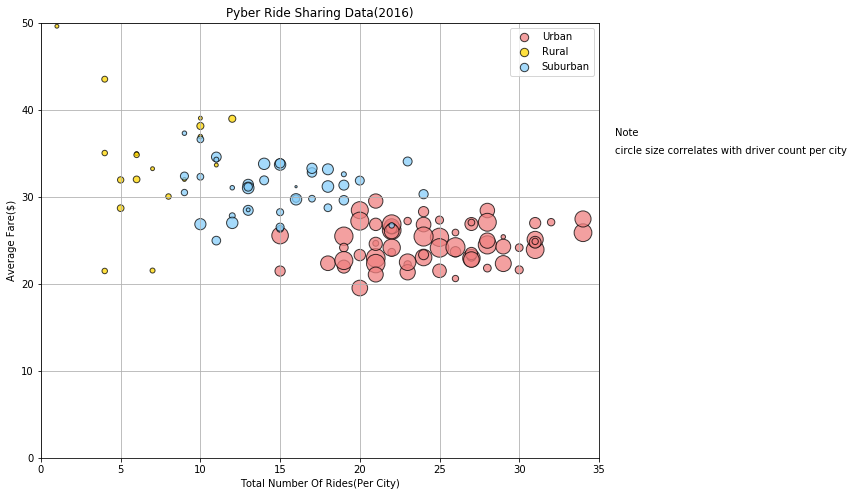

In [13]:
# create scatterplots for each city type dataframes
# scatter plot for urban
plt.figure(figsize=(10,8))
plt.grid(True)
sct_urban = plt.scatter(x=rides_city_urban,y=avgfare_urban,marker="o",
                        color="lightcoral",s=drivers_urban,edgecolors='black',alpha=0.75,label="Urban")
# scatter plot for rural
sct_rural = plt.scatter(x=rides_city_rural,y=avgfare_rural,marker="o",
                        color="gold",s=drivers_rural,edgecolors='black',alpha=0.75,label="Rural")
# scatter plot for Suburban
sct_sub = plt.scatter(x=rides_city_sub,y=avgfare_sub,marker="o",
                      color="lightskyblue",s=drivers_sub,edgecolors='black',alpha=0.75,label="Suburban")

# pass the legends and set equal sizes for legend points
lgnd = plt.legend(handles=[sct_urban,sct_rural,sct_sub],loc="best")
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

# set annotation texts and their positions on the chart
plt.text(36,37,'Note',fontsize=10)
plt.text(36,35,'circle size correlates with driver count per city',fontsize=10)

# setting x and y limits
plt.xlim(0,35)
plt.ylim(0,50)

# axis labels and title
plt.savefig("mypyber.png")
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average Fare($)")

plt.show()


In [57]:
# pie charts
# % of total fares by city type
# % of total fare for urban
# total fare for all the city types combined
total_fare = round(ride_df["fare"].sum(),2)
# total fare for Urban
grouped_type = merge_df.groupby("type")
total_fare_type = grouped_type["fare"].sum()
# % total fare for each city type
percent_fare_type = [(x/total_fare)*100 for x in total_fare_type]


[62.965459783938456, 31.948580476976858, 6.6849998845271221]

In [171]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent_fare_type

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "yellowgreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.25]

In [172]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percent_fare_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Of Total Fares (Per City Type)")

In [173]:
# a pie chart with equal axes
plt.axis("equal")

(-1.11462397804305,
 1.1144226692634001,
 -1.1554270498751096,
 1.1140802538127261)

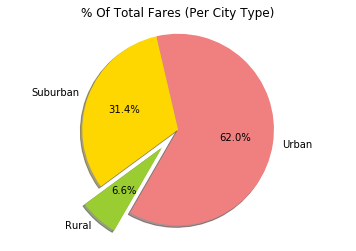

In [174]:
# % of Total fares by city Type
plt.show()

In [152]:
# % of total rides by city type
# Total rides for all cities combined
total_rides = ride_df["ride_id"].count()

# groupby city type
total_rides_type = grouped_type["ride_id"].count()
total_rides_type

# % total rides for each city type
percent_rides_type = [(x/total_rides)*100 for x in total_rides_type]
percent_rides_type

[68.421052631578945, 27.663157894736841, 5.2631578947368416]

In [175]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent_rides_type

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "yellowgreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.25]

In [176]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percent_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Of Total Rides(Per City Type)")

In [177]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1109503009358856,
 1.1050945005859638,
 -1.1626796488641793,
 1.1105014575263785)

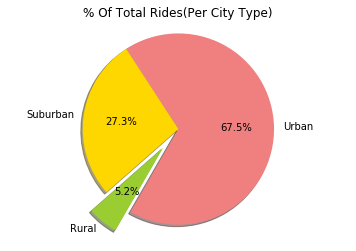

In [178]:
# % of Total rides Per city Type
plt.show()

In [157]:
# % of total drivers per City Type
# Total drivers for all cities combined
total_drivers = city_df["driver_count"].sum()

# total drivers for urban
# groupby city type and city
grouped_city_type = city_df.groupby("type")
total_drivers_type = grouped_city_type["driver_count"].sum()

# % total drivers for each city type
percent_drivers_type = [(x/total_drivers)*100 for x in total_drivers_type]


In [179]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent_drivers_type

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "yellowgreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.25]

In [180]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percent_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Of Total Drivers (Per City Type)")

In [181]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1195402788517075,
 1.1047086085116691,
 -1.1728086528708919,
 1.1037963935744863)

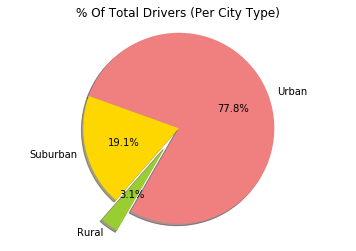

In [182]:
# % of Total drivers Per city Type
plt.show()